In [22]:
#Load dependencies
import pandas as pd
import numpy as np
from matplotlib import*
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
from sklearn.decomposition import PCA as sklearnPCA
import seaborn

In [23]:
import scipy.io as sio
faces = sio.loadmat('face.mat')
x = faces['X'] #image dataset
l = faces['l'] #image ids

In [24]:
x,l

(array([[106, 130, 191, ...,  70, 183,  77],
        [103, 129, 185, ...,  62, 250,  72],
        [103, 130, 174, ...,  83, 163,  68],
        ...,
        [ 37,  40,  22, ...,  87, 102,  93],
        [ 36,  36,  19, ...,  89,  95, 103],
        [ 41,  35,  17, ...,  94, 106, 110]], dtype=uint8),
 array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,
          2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,
          4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,
          5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,
          7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
          9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10,
         10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12,
         12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13,
         13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15,
         15, 15, 15, 15, 15, 15, 16, 16, 16, 

In [25]:
mean_vec = np.mean(x, axis=0)
cov_mat = (x - mean_vec).T.dot((x - mean_vec)) / (x.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[2806.55046192 1490.76930592 1887.07935024 ...  585.03080896
   796.14844962  729.26134053]
 [1490.76930592 1931.84058855 1195.12587348 ...  270.38959416
   362.35489357  533.36781523]
 [1887.07935024 1195.12587348 2282.04871118 ...  383.76760282
   789.34487668  355.62480341]
 ...
 [ 585.03080896  270.38959416  383.76760282 ... 1245.59399732
   540.61168245  519.11243291]
 [ 796.14844962  362.35489357  789.34487668 ...  540.61168245
  2099.50525478 1024.47584755]
 [ 729.26134053  533.36781523  355.62480341 ...  519.11243291
  1024.47584755 1354.14630827]]


In [35]:
mean_vec

array([104.76475155, 101.31677019,  88.72166149,  78.19604037,
        88.65450311,  76.10054348,  72.52756211,  66.15333851,
        78.90023292,  76.08695652, 104.78377329,  85.75310559,
       120.31638199, 107.60326087, 105.85830745, 120.70147516,
        97.61024845,  92.67158385, 100.79347826, 100.11878882,
        85.01086957,  71.02135093,  85.44332298,  84.26979814,
        84.11568323,  73.79192547,  64.1246118 ,  84.70069876,
        65.92857143,  66.20069876,  53.52329193,  65.84743789,
        43.42003106,  54.24495342,  47.96545031,  59.19875776,
        48.0939441 ,  48.09860248,  44.85559006,  46.41653727,
        96.85209627, 118.47321429, 112.95885093, 105.82104037,
       107.23990683, 115.73175466, 100.97981366,  92.84976708,
        99.08773292, 104.18361801,  85.83423913, 103.64829193,
        73.77018634,  66.58152174,  80.95341615,  89.88742236,
        82.17624224,  72.33462733,  84.82919255,  71.47670807,
        83.51746894, 110.44875776,  92.88664596,  74.92

In [26]:
print('NumPy covariance matrix: \n%s' %np.cov(x.T))

NumPy covariance matrix: 
[[2806.55046192 1490.76930592 1887.07935024 ...  585.03080896
   796.14844962  729.26134053]
 [1490.76930592 1931.84058855 1195.12587348 ...  270.38959416
   362.35489357  533.36781523]
 [1887.07935024 1195.12587348 2282.04871118 ...  383.76760282
   789.34487668  355.62480341]
 ...
 [ 585.03080896  270.38959416  383.76760282 ... 1245.59399732
   540.61168245  519.11243291]
 [ 796.14844962  362.35489357  789.34487668 ...  540.61168245
  2099.50525478 1024.47584755]
 [ 729.26134053  533.36781523  355.62480341 ...  519.11243291
  1024.47584755 1354.14630827]]


In [27]:
#Perform eigendecomposition on covariance matrix
cov_mat = np.cov(x.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.06602667  0.01104711  0.04436251 ...  0.00631561  0.03435145
  -0.02028382]
 [ 0.03181648 -0.00148726  0.04757846 ...  0.04218133  0.00346875
  -0.01201677]
 [ 0.0608956  -0.0087206  -0.00051175 ...  0.1509385  -0.00894678
  -0.00702069]
 ...
 [ 0.02779266 -0.0001546   0.04325758 ...  0.00973427 -0.07504817
   0.00278474]
 [ 0.04399205  0.02754092  0.00523021 ... -0.00779072 -0.00617477
   0.02583282]
 [ 0.03155445  0.03014632  0.04273412 ...  0.03711877 -0.02471916
  -0.01075868]]

Eigenvalues 
[3.11022442e+05 1.05982034e+05 9.39576251e+04 4.82405102e+04
 4.45400049e+04 2.82798368e+04 2.56788052e+04 2.14673998e+04
 1.68948815e+04 1.45153236e+04 1.30131318e+04 1.12523586e+04
 1.04400262e+04 9.43327641e+03 8.72040191e+03 7.73985483e+03
 7.18384586e+03 6.84208732e+03 6.58537080e+03 6.21656822e+03
 5.61879002e+03 5.23735386e+03 5.13109587e+03 4.67997367e+03
 4.48396374e+03 4.42970357e+03 4.34614492e+03 3.81170206e+03
 3.55777587e+03 3.51545309e+03 3.44634577e+03 3.19349

In [28]:
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
311022.4420849844
105982.03353361382
93957.62505013801
48240.510209135056
44540.00490112329
28279.836809758977
25678.805248032084
21467.399846539174
16894.881478801017
14515.323622661926
13013.13182960087
11252.358606274463
10440.02621979263
9433.276408770507
8720.401909281629
7739.854830825744
7183.845863089899
6842.087317192625
6585.370804791674
6216.568219030426
5618.790020050505
5237.353861294975
5131.095872870628
4679.973665946103
4483.963735341708
4429.703573415428
4346.144918060908
3811.702055672763
3557.7758697754457
3515.453088781213
3446.345766410721
3193.495118063144
3138.557862504642
3063.3771021689386
2858.199746994838
2768.89945567036
2674.5495281215694
2556.374861075687
2526.908494401603
2439.873904964791
2418.890895682103
2201.9543025474986
2151.3413153450174
2121.751139201031
2066.1029168634536
2004.8314845741309
1959.983886001329
1931.5489803190724
1869.4482217858101
1813.2036868897644
1768.8743234713374
1713.6497123060776
1661.8325298

In [33]:
pca = sklearnPCA(n_components=2)
pca.fit_transform(x)
pca.explained_variance_ratio_

array([0.30885841, 0.10524463])

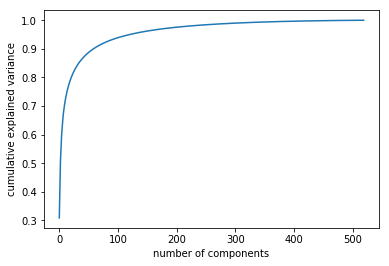

In [34]:
#Explained variance
pca = sklearnPCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()